## pipeline

Loading sequences: 100%|██████████| 5095/5095 [00:00<00:00, 663313.74it/s]


Features saved to ../dataset/demonstration_samples/GCF_000175755.1/features.pa
predicted_class_name
none    10127
PICI       17
Name: count, dtype: int64
function
no_hit                                              2406
moron_auxiliary_metabolic_gene_and_host_takeover     659
unknown_function                                     484
dna_rna_and_nucleotide_metabolism                    454
other                                                228
tail                                                 219
transcription_regulation                             190
lysis                                                145
head_and_packaging                                   137
integration_and_excision                             109
connector                                             64
Name: count, dtype: int64


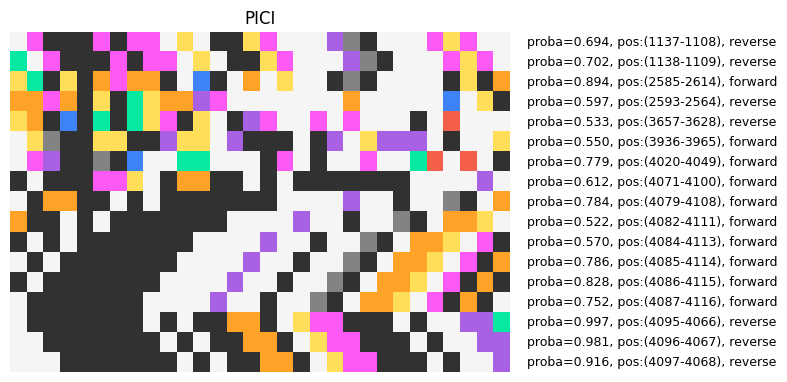

In [1]:
from pici_predictor.utilities import discover_pici

data_dir = "../dataset/demonstration_samples/GCF_000175755.1"
results_dir = "../results/demonstration/GCF_000175755.1"
model_function_path = "../models/best_configs"
model_pici_path = "../models/pici_classifier_model.json"
pici_segments = discover_pici(
    data_dir, results_dir, model_function_path, model_pici_path
)

## visualization

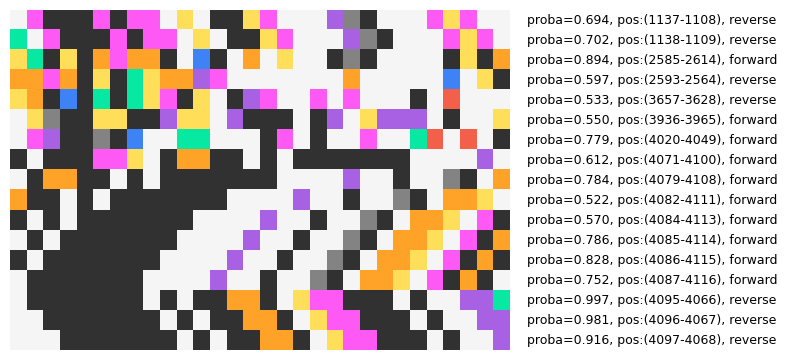

In [34]:
from pici_predictor.phrog_function import function_num_to_color
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Prepare your data as before
heatmap_data = np.array(pici_segments["function_vector"].tolist())
labels = [
    f"proba={row.predicted_prob:.3f}, pos:({row.start_idx}-{row.end_idx}), {'reverse' if not row.forward else 'forward'}"
    for _, row in pici_segments.iterrows()
]
function_nums_sorted = sorted(function_num_to_color.keys())
color_list = [function_num_to_color[num] for num in function_nums_sorted]
cmap = ListedColormap(color_list)
num_to_idx = {num: i for i, num in enumerate(function_nums_sorted)}
heatmap_indices = np.vectorize(num_to_idx.get)(heatmap_data)

# Plot
fig, ax = plt.subplots(figsize=(5, len(heatmap_indices) * 0.2))
im = ax.imshow(heatmap_indices, aspect="auto", cmap=cmap)

# Remove axes, ticks, and margins
ax.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Add labels as text
for i, label in enumerate(labels):
    ax.text(
        heatmap_indices.shape[1] + 0.5,  # x position (just to the right of the heatmap)
        i,  # y position (row)
        label,
        va="center",
        ha="left",
        fontsize=9,
        color="black",
    )

plt.savefig(
    "../results/demonstration/GCF_000175755.1/pici_segments_heatmap.png",
    bbox_inches="tight",
    pad_inches=0,
    dpi=300,
)
